# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import w_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
### Inspect the data and remove the cities where the humidity > 100%
### Convert Raw Data to DataFrame

In [3]:
output = {}
city_data = []
longitude = []
latitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
dates = []

for city in cities:
    query_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + w_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if "message" in weather_json:
        print(f'City {cities.index(city)+1}: {city.title()} NOT found')
    else:
        print(f'City {cities.index(city)+1}: {city.title()} found, processing...')
        city_data.append(city.title())
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        dates.append(weather_json["dt"])
weather_df = pd.DataFrame({"City":city_data,"Latitude":latitude,"Longitude":longitude,\
                          "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,\
                         "Wind Speed":wind_speed,"Country":country,"Date":dates})
weather_df.head()

City 1: Palmerston found, processing...
City 2: Kapaa found, processing...
City 3: Avarua found, processing...
City 4: Bambous Virieux found, processing...
City 5: Busselton found, processing...
City 6: Higuey NOT found
City 7: Zaraza found, processing...
City 8: Bluff found, processing...
City 9: Salalah found, processing...
City 10: Punta Arenas found, processing...
City 11: Taoudenni found, processing...
City 12: Elko found, processing...
City 13: Carnarvon found, processing...
City 14: Chadan found, processing...
City 15: Ushuaia found, processing...
City 16: Mantua found, processing...
City 17: Bredasdorp found, processing...
City 18: Tuatapere found, processing...
City 19: Ampanihy found, processing...
City 20: Upernavik found, processing...
City 21: Rio Grande found, processing...
City 22: Luderitz found, processing...
City 23: Yellowknife found, processing...
City 24: Katsuura found, processing...
City 25: Taltal found, processing...
City 26: Port Elizabeth found, processing...

City 211: Ca Mau found, processing...
City 212: Svetlyy found, processing...
City 213: Sataua NOT found
City 214: Naze found, processing...
City 215: Saldanha found, processing...
City 216: Ilulissat found, processing...
City 217: Prince Rupert found, processing...
City 218: Bathsheba found, processing...
City 219: Yeletskiy NOT found
City 220: Tateyama found, processing...
City 221: Arman found, processing...
City 222: Sentyabrskiy NOT found
City 223: Maloshuyka NOT found
City 224: Bargal NOT found
City 225: Amderma NOT found
City 226: La Palma found, processing...
City 227: Mitzic found, processing...
City 228: Guerrero Negro found, processing...
City 229: Fort Nelson found, processing...
City 230: Pakxan found, processing...
City 231: Ekhabi found, processing...
City 232: Te Anau found, processing...
City 233: Hasaki found, processing...
City 234: Hithadhoo found, processing...
City 235: Samarai found, processing...
City 236: Faanui found, processing...
City 237: Yian NOT found
City

City 421: Tonekabon found, processing...
City 422: Voyvozh found, processing...
City 423: Timbiqui found, processing...
City 424: Krasnyy Chikoy found, processing...
City 425: Maiduguri found, processing...
City 426: Vila found, processing...
City 427: Gweta found, processing...
City 428: Baghdad found, processing...
City 429: Narsaq found, processing...
City 430: Saint-Augustin found, processing...
City 431: Cochrane found, processing...
City 432: Batemans Bay found, processing...
City 433: Bahia Blanca found, processing...
City 434: Morros found, processing...
City 435: Lolua NOT found
City 436: Dubbo found, processing...
City 437: Pemangkat found, processing...
City 438: Monchegorsk found, processing...
City 439: Viedma found, processing...
City 440: Webuye found, processing...
City 441: Idlib found, processing...
City 442: Tidore NOT found
City 443: Karoi found, processing...
City 444: San Juan found, processing...
City 445: Burriana found, processing...
City 446: Burica NOT found


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palmerston,-12.49,130.98,64.40,88,0,2.24,AU,1595536543
1,Kapaa,22.08,-159.32,82.40,74,20,11.41,US,1595536577
2,Avarua,-21.21,-159.78,75.20,94,5,4.70,CK,1595536515
3,Bambous Virieux,-20.34,57.76,66.99,77,75,18.34,MU,1595536577
4,Busselton,-33.65,115.33,43.00,76,0,4.76,AU,1595536578


In [4]:
weather_df["Humidity"].max()

100

In [5]:
if weather_df["Humidity"].max() > 100:
    print('Humidity values over 100% have been removed.')
    weather_df = weather_df[weather_df.Humidity <= 100]
else:
    print('All Humidity values are already 100% or less.')
weather_df

All Humidity values are already 100% or less.


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palmerston,-12.49,130.98,64.40,88,0,2.24,AU,1595536543
1,Kapaa,22.08,-159.32,82.40,74,20,11.41,US,1595536577
2,Avarua,-21.21,-159.78,75.20,94,5,4.70,CK,1595536515
3,Bambous Virieux,-20.34,57.76,66.99,77,75,18.34,MU,1595536577
4,Busselton,-33.65,115.33,43.00,76,0,4.76,AU,1595536578
...,...,...,...,...,...,...,...,...,...
565,Mandalgovi,45.76,106.27,71.53,50,97,5.59,MN,1595536656
566,Santander Jimenez,24.22,-98.47,98.98,35,20,16.17,MX,1595536656
567,Morant Bay,17.88,-76.41,80.60,74,75,19.46,JM,1595536656
568,Falkensee,52.57,13.08,62.60,55,10,1.12,DE,1595536657


In [6]:
weather_df.to_csv(output_data_file)

## Latitude vs. Temperature Plot

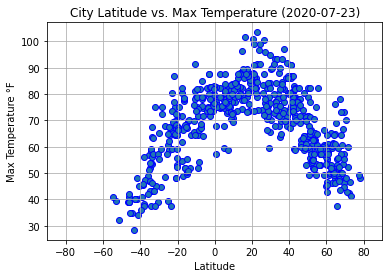

In [7]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"],edgecolors='b')
plt.title(f"City Latitude vs. Max Temperature ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °F")
plt.grid()
plt.xlim((-90,90))
plt.savefig('city_maxtemp.png')

## Latitude vs. Humidity Plot

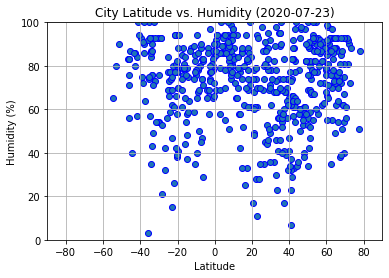

In [8]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors='b')
plt.title(f"City Latitude vs. Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim((-90,90))
plt.ylim((0,100))
plt.savefig('city_humidity.png')

## Latitude vs. Cloudiness Plot

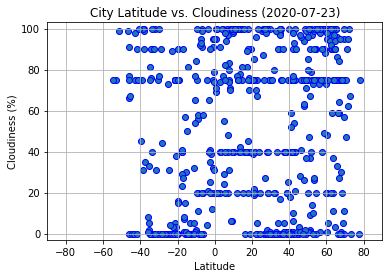

In [9]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors='b')
plt.title(f"City Latitude vs. Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim((-90,90))
plt.ylim((-3,103))
plt.savefig('city_cloudiness.png')

## Latitude vs. Wind Speed Plot

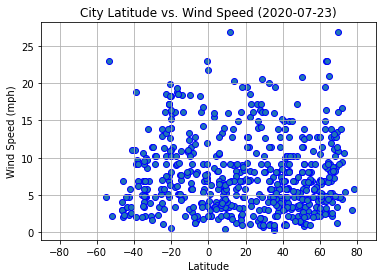

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors='b')
plt.title(f"City Latitude vs. Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim((-90,90))
plt.show()
plt.savefig('city_windspeed.png')

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_cities = weather_df[weather_df.Latitude > 0]
north_cities.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kapaa,22.08,-159.32,82.40,74,20,11.41,US,1595536577
5,Zaraza,9.35,-65.32,83.95,81,6,3.29,VE,1595536578
7,Salalah,17.02,54.09,78.80,94,40,8.05,OM,1595536538
9,Taoudenni,22.68,-3.98,103.51,11,0,4.16,ML,1595536578
10,Elko,41.00,-115.50,91.00,7,59,10.00,US,1595536579


In [13]:
south_cities = weather_df[weather_df.Latitude < 0]
south_cities.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palmerston,-12.49,130.98,64.40,88,0,2.24,AU,1595536543
2,Avarua,-21.21,-159.78,75.20,94,5,4.70,CK,1595536515
3,Bambous Virieux,-20.34,57.76,66.99,77,75,18.34,MU,1595536577
4,Busselton,-33.65,115.33,43.00,76,0,4.76,AU,1595536578
6,Bluff,-46.60,168.33,39.00,83,99,3.00,NZ,1595536578


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.4847303519920262


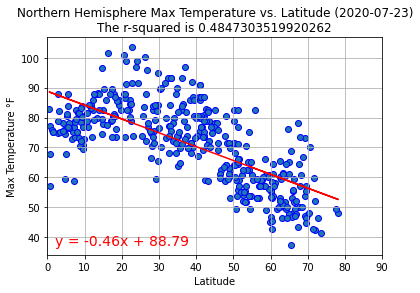

In [22]:
x_values = north_cities["Latitude"]
y_values = north_cities["Max Temp"]

plt.scatter(x_values,y_values,edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °F")
plt.grid()
plt.xlim((0,90))
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2,min(y_values)),fontsize=14,color="red")
plt.title(f"Northern Hemisphere Max Temperature vs. Latitude ({date.today()})\nThe r-squared is {r_value * r_value}")
plt.savefig('north_maxtemp.png')
print(f"The r-squared is {r_value * r_value}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.6264977391506087


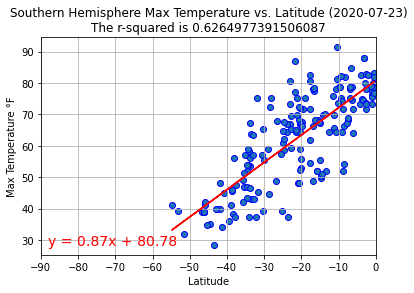

In [23]:
x_values = south_cities["Latitude"]
y_values = south_cities["Max Temp"]

plt.scatter(x_values,y_values,edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °F")
plt.grid()
plt.xlim((-90,0))
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-88,min(y_values)),fontsize=14,color="red")
plt.title(f"Southern Hemisphere Max Temperature vs. Latitude ({date.today()})\nThe r-squared is {r_value * r_value}")
plt.savefig('south_maxtemp.png')
print(f"The r-squared is {r_value * r_value}")

### Trends Analysis

The range of maximum temperatures in the Northern Hemisphere is warmer than the Southern Hemisphere, which makes sense due to the seasons; it's Summer in the North and Winter in the South.

Even with the seasons taken into account, the lines both show that the max temperature tends to be warmer, the closer you go to the equator (latitude 0).

The points show that there are more weather stations / populated places in the high latitudes in the Northern Hemisphere, than in the Southern Hemisphere.

The correlation between latitude and maximum temperature is much stronger than for any of the other pairings between latitude and weather conditions.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0005971184617831677


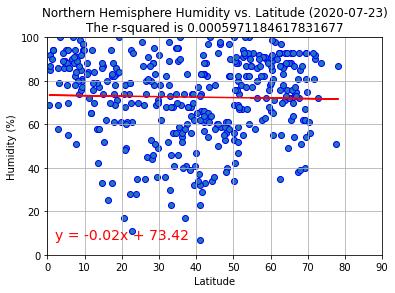

In [24]:
x_values = north_cities["Latitude"]
y_values = north_cities["Humidity"]

plt.scatter(x_values,y_values,edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim((0,90))
plt.ylim((0,100))
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2,min(y_values)),fontsize=14,color="red")
plt.title(f"Northern Hemisphere Humidity vs. Latitude ({date.today()})\nThe r-squared is {r_value * r_value}")
plt.savefig('north_humidity.png')
print(f"The r-squared is {r_value * r_value}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.003878122714644952


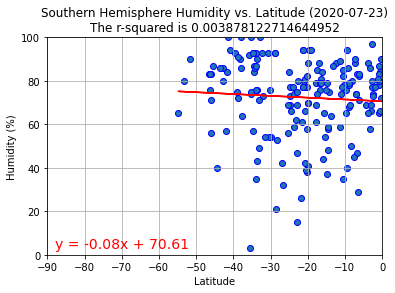

In [25]:
x_values = south_cities["Latitude"]
y_values = south_cities["Humidity"]

plt.scatter(x_values,y_values,edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim((-90,0))
plt.ylim((0,100))
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-88,min(y_values)),fontsize=14,color="red")
plt.title(f"Southern Hemisphere Humidity vs. Latitude ({date.today()})\nThe r-squared is {r_value * r_value}")
plt.savefig('south_humidity.png')
print(f"The r-squared is {r_value * r_value}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 3.463896920012788e-05


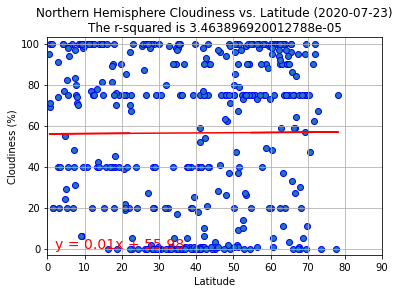

In [26]:
x_values = north_cities["Latitude"]
y_values = north_cities["Cloudiness"]

plt.scatter(x_values,y_values,edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim((0,90))
plt.ylim((-3,103))
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2,min(y_values)),fontsize=14,color="red")
plt.title(f"Northern Hemisphere Cloudiness vs. Latitude ({date.today()})\nThe r-squared is {r_value * r_value}")
plt.savefig('north_cloudiness.png')
print(f"The r-squared is {r_value * r_value}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0068946433052055785


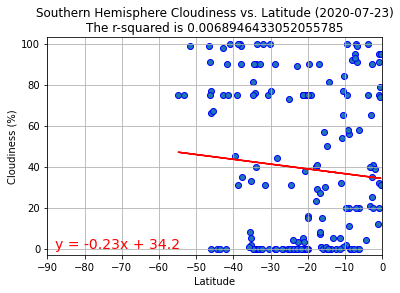

In [27]:
x_values = south_cities["Latitude"]
y_values = south_cities["Cloudiness"]

plt.scatter(x_values,y_values,edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim((-90,0))
plt.ylim((-3,103))
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-88,min(y_values)),fontsize=14,color="red")
plt.title(f"Southern Hemisphere Cloudiness vs. Latitude ({date.today()})\nThe r-squared is {r_value * r_value}")
plt.savefig('south_cloudiness.png')
print(f"The r-squared is {r_value * r_value}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0030959828243914103


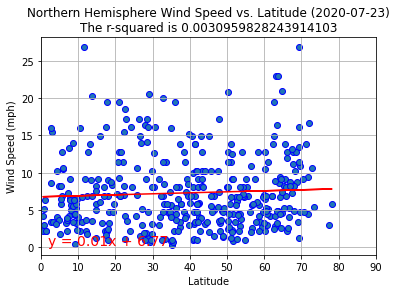

In [28]:
x_values = north_cities["Latitude"]
y_values = north_cities["Wind Speed"]

plt.scatter(x_values,y_values,edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim((0,90))
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2,min(y_values)),fontsize=14,color="red")
plt.title(f"Northern Hemisphere Wind Speed vs. Latitude ({date.today()})\nThe r-squared is {r_value * r_value}")
plt.savefig('north_windspeed.png')
print(f"The r-squared is {r_value * r_value}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.02771117509908081


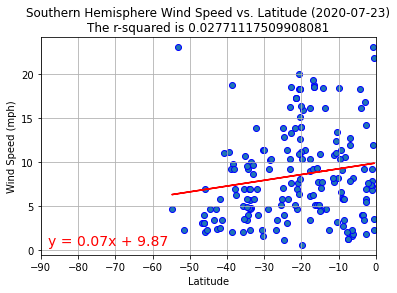

In [29]:
x_values = south_cities["Latitude"]
y_values = south_cities["Wind Speed"]

plt.scatter(x_values,y_values,edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim((-90,0))
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-88,min(y_values)),fontsize=14,color="red")
plt.title(f"Southern Hemisphere Wind Speed vs. Latitude ({date.today()})\nThe r-squared is {r_value * r_value}")
plt.savefig('south_windspeed.png')
print(f"The r-squared is {r_value * r_value}")